<a href="https://colab.research.google.com/github/lauramoraes/Text_Mining/blob/master/1%20-%20Aquisi%C3%A7%C3%A3o%20de%20Dados%20de%20Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aquisição de Dados

O primeiro processo da Mineração de Texto, é garantir que temos os dados necessários para análise. A mineração de texto é muito dinâmica e provavelmente temos que montar um **fluxo contínuo** de aquisição dos dados necessário. Neste notebook vamos exemplificar como recuperar dados de Tweets.

### Importando bibliotecas a serem usadas

In [1]:
install.packages("rtweet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
suppressMessages(suppressWarnings(library(rtweet)))
suppressMessages(suppressWarnings(library(dplyr)))

### Pedindo autorização

In [0]:
consumer_key <- ""
consumer_secret <-""
access_token <- ""
access_secret <- ""

In [0]:
## authenticate via access token
token <- create_token(
  app = "FGV MBA",
  consumer_key = consumer_key,
  consumer_secret = consumer_secret,
  access_token = access_token,
  access_secret = access_secret)

In [7]:
token

<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> FGV MBA
  key:    ZZEano8Nn9W4UVJaHiaV6cRzO
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret
---

### Download dos dados
Veja o que esse biblioteca pode fazer em: https://rtweet.info/

In [13]:
## search for 200 tweets using the rstats hashtag
tweets <- search_tweets(
  "FGV", n = 200, include_rts = FALSE, retryonratelimit = TRUE
)
tweets

Warning message:
“Rate limit exceeded - 88”Warning message:
“Rate limit exceeded”

<0 x 0 matrix>

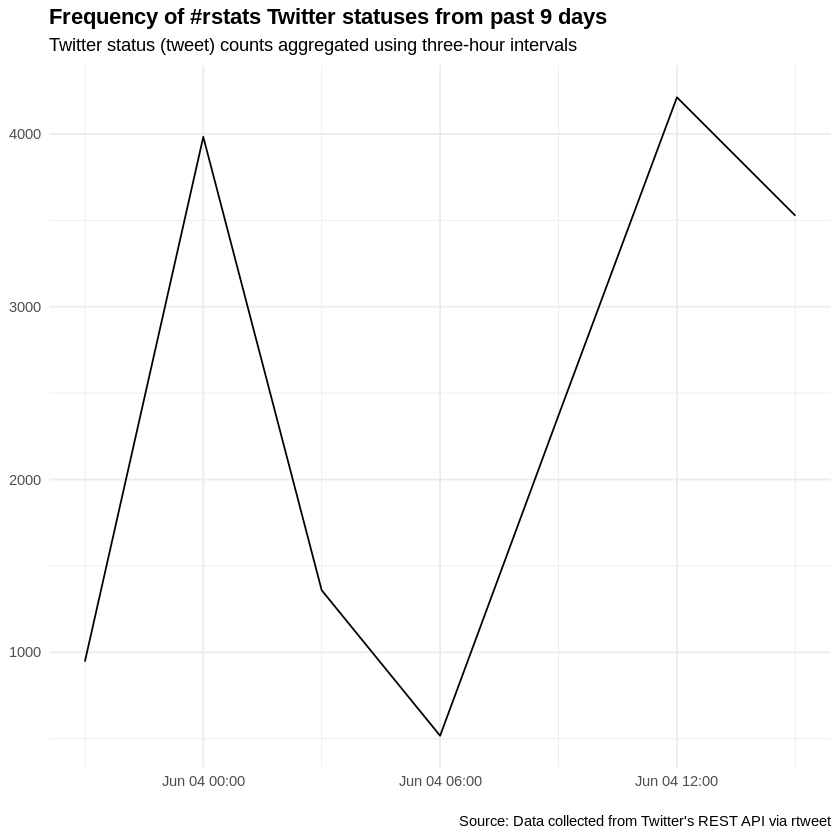

In [12]:
## plot time series of tweets
tweets %>%
  ts_plot("3 hours") +
  ggplot2::theme_minimal() +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
  ggplot2::labs(
    x = NULL, y = NULL,
    title = "Frequency of #rstats Twitter statuses from past 9 days",
    subtitle = "Twitter status (tweet) counts aggregated using three-hour intervals",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

### Verificando nosso limites de quota

In [56]:
## get all rate_limit information for default token
# rate_limit()
rate_limit(token, "search_tweets")
rate_limit(token, "get_trends")

query,limit,remaining,reset,reset_at,timestamp,app
<chr>,<int>,<int>,<drtn>,<dttm>,<dttm>,<chr>
search/tweets,180,180,15.00546 mins,2019-06-04 17:46:03,2019-06-04 17:31:03,FGV MBA


query,limit,remaining,reset,reset_at,timestamp,app
<chr>,<int>,<int>,<drtn>,<dttm>,<dttm>,<chr>
trends/place,75,73,14.6374 mins,2019-06-04 17:45:41,2019-06-04 17:31:03,FGV MBA


### Buscando trends

In [0]:
trends_codes <- trends_available()

In [42]:
filter(trends_codes, countryCode == "BR")

name,url,parentid,country,woeid,countryCode,code,place_type
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
Brasília,http://where.yahooapis.com/v1/place/455819,23424768,Brazil,455819,BR,7,Town
Belém,http://where.yahooapis.com/v1/place/455820,23424768,Brazil,455820,BR,7,Town
Belo Horizonte,http://where.yahooapis.com/v1/place/455821,23424768,Brazil,455821,BR,7,Town
Curitiba,http://where.yahooapis.com/v1/place/455822,23424768,Brazil,455822,BR,7,Town
Porto Alegre,http://where.yahooapis.com/v1/place/455823,23424768,Brazil,455823,BR,7,Town
Recife,http://where.yahooapis.com/v1/place/455824,23424768,Brazil,455824,BR,7,Town
Rio de Janeiro,http://where.yahooapis.com/v1/place/455825,23424768,Brazil,455825,BR,7,Town
Salvador,http://where.yahooapis.com/v1/place/455826,23424768,Brazil,455826,BR,7,Town
São Paulo,http://where.yahooapis.com/v1/place/455827,23424768,Brazil,455827,BR,7,Town


In [53]:
location <-  pull(filter(trends_codes, name == "Rio de Janeiro")["woeid"])
location

[1] 455825

In [55]:
trends <- get_trends(woeid = location)
trends

trend,url,promoted_content,query,tweet_volume,place,woeid,as_of,created_at
<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,<int>,<dttm>,<dttm>
Neymar,http://twitter.com/search?q=Neymar,NA,Neymar,499676,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19
Flamengo,http://twitter.com/search?q=Flamengo,NA,Flamengo,108117,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19
#THISNIGHTbyJIN,http://twitter.com/search?q=%23THISNIGHTbyJIN,NA,%23THISNIGHTbyJIN,564352,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19
#ByJinIsComing,http://twitter.com/search?q=%23ByJinIsComing,NA,%23ByJinIsComing,639061,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19
#QueReformaÉEssa,http://twitter.com/search?q=%23QueReforma%C3%89Essa,NA,%23QueReforma%C3%89Essa,14525,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19
#TonightByJinOutNow,http://twitter.com/search?q=%23TonightByJinOutNow,NA,%23TonightByJinOutNow,184774,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19
CNN Brasil,http://twitter.com/search?q=%22CNN+Brasil%22,NA,%22CNN+Brasil%22,NA,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19
#이밤ByJin,http://twitter.com/search?q=%23%EC%9D%B4%EB%B0%A4ByJin,NA,%23%EC%9D%B4%EB%B0%A4ByJin,334830,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19
Kratos,http://twitter.com/search?q=Kratos,NA,Kratos,NA,Rio de Janeiro,455825,2019-06-04 17:30:47,2019-06-04 17:27:19


### Explorando a biblioteca
Verifique quais outras funções existem na biblioteca. Recupere trends do Brasil, do Rio de Janeiro, recupere tweets procurando por hashtags, etc

https://rtweet.info/reference/index.html

In [0]:
### Escreva o código aqui

### Salvando nossos tweets para mais tarde

In [0]:
save_as_csv(trends, 'trends.csv', prepend_ids = TRUE, na = "",
  fileEncoding = "UTF-8")